# Explicação Detalhada do Código do Projeto de Backpropagation

Código desenvolvido por:
- Cláudio Klautau Mello 202007140012
- Joeny Santos Farias 201707140011

## 1. Introdução

Este notebook fornece uma explicação detalhada do código desenvolvido para o projeto de implementação do algoritmo Backpropagation. O projeto foi realizado como parte da disciplina de Redes Neurais Artificiais, com o objetivo de criar uma rede neural capaz de classificar dados de mamografia.



## 2. Importação das Bibliotecas

Nesta seção, importamos as bibliotecas essenciais para o projeto:

- NumPy (np): Utilizada para operações numéricas eficientes e manipulação de arrays.
- Matplotlib (plt): Usada para criar visualizações e gráficos dos resultados.
- Pandas (pd): Empregada para leitura e manipulação dos dados de mamografia.

Estas bibliotecas formam a base do nosso ambiente de desenvolvimento, proporcionando as ferramentas necessárias para processamento de dados, implementação do algoritmo e visualização dos resultados.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.metrics import confusion_matrix
import sklearn
import seaborn as sns

print("NumPy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Pandas version:", pd.__version__)
print("SKLearn version:", sklearn.__version__)
print("Seaborn version:", sns.__version__)


NumPy version: 1.26.4
Matplotlib version: 3.9.1.post1
Pandas version: 2.2.2
SKLearn version: 1.5.1
Seaborn version: 0.13.2


## 3. Implementação da Classe MLP_Classifier

A classe `MLP_Classifier` é o coração do nosso projeto. Vamos detalhar cada método:


### 3.1 Método __init__

O construtor da classe inicializa a arquitetura da rede neural:

- `input_units`: Número de unidades na camada de entrada, correspondente ao número de características dos dados.
- `hidden_units`: Número de neurônios na camada oculta, um hiperparâmetro ajustável.
- `output_units`: Número de unidades na camada de saída (1 para classificação binária).
- `activation`: Função de ativação a ser utilizada (padrão: sigmoid).

Os pesos são inicializados aleatoriamente usando uma distribuição normal, o que é uma prática comum para iniciar o treinamento da rede neural.

### 3.2 Método activation_function

Este método implementa a função de ativação escolhida. No caso da função sigmoid:

```python
return 1 / (1 + np.exp(-x))
```

A função sigmoid mapeia qualquer input para um valor entre 0 e 1, tornando-a útil para problemas de classificação binária.


### 3.3 Método forward_propagation

Este método realiza a propagação para frente na rede:

1. Calcula a saída da camada oculta: `self.hidden_layer = self.activation_function(np.dot(self.input_layer, self.hidden_weights))`
2. Calcula a saída da rede: `self.output = self.activation_function(np.dot(self.hidden_layer, self.output_weights))`

Esse processo transforma os dados de entrada através das camadas da rede para produzir uma previsão.

### 3.4 Método backpropagation

Este é o método principal de treinamento da rede. Ele implementa o algoritmo de backpropagation:

1. Divisão dos Dados:
Os dados são divididos em dois conjuntos: treino e validação. O conjunto de treino é utilizado para ajustar os pesos da rede, enquanto o conjunto de validação é utilizado para avaliar o desempenho do modelo e evitar overfitting.
2. Treinamento por épocas:
O treinamento é realizado em múltiplas épocas. Cada época consiste em uma passagem completa pelos dados de treino.
3. Forward Propagation:
   - Para cada amostra no conjunto de treino, a entrada é passada através da rede camada por camada.
   - Em cada camada, os pesos e biases são aplicados, e uma função de ativação é utilizada para calcular a saída da camada.
   - A saída da última camada é a previsão da rede para a amostra de entrada.
4. Cálculo do Erro:
   - O erro da previsão é calculado comparando a saída da rede com o valor real esperado.
   - A função de erro utilizada é a função de erro quadrático médio (Mean Squared Error - MSE), que é definida como a média dos quadrados das diferenças entre as previsões e os valores reais.
5. Backpropagation:
   - O erro calculado é propagado de volta através da rede para calcular os gradientes dos pesos e biases.
   - A derivada da função de erro em relação à saída da rede é calculada e utilizada para ajustar os pesos e biases de cada camada.
6. Atualização dos Pesos:
   - Os pesos e biases são atualizados utilizando o gradiente descendente, que é um método de otimização que ajusta os pesos na direção oposta ao gradiente.
   - O tamanho do passo de ajuste é controlado pela taxa de aprendizado, um hiperparâmetro que determina a rapidez com que a rede aprende.
7. Avaliação do Modelo:
   - Após cada época, o modelo é avaliado utilizando o conjunto de validação.
   - A acurácia e a perda são calculadas para avaliar o desempenho do modelo.
   - O progresso do treinamento é exibido para monitorar o desempenho da rede ao longo do tempo.
   - O treinamento é interrompido se a perda no conjunto de validação não melhorar por um número específico de épocas, evitando overfitting.
   - O modelo final é o que obteve a menor perda no conjunto de validação.
8. Retorno do Histórico:
   - O método retorna um histórico das perdas de treino e validação, permitindo visualizar o progresso do treinamento.
   - Isso é útil para identificar problemas de convergência, overfitting ou underfitting.
   - O histórico pode ser utilizado para ajustar os hiperparâmetros do modelo e melhorar o desempenho da rede.
   - O método também retorna o modelo treinado, que pode ser utilizado para fazer previsões em novos dados.
   - O modelo é composto pelos pesos e biases ajustados durante o treinamento.
   - Ele é capaz de fazer previsões em novos dados após o treinamento.



In [27]:
class MLP_Classifier:
    """
    MLP_Classifier class.

    This class represents a neural network model with a specified number of input units, hidden units, and output units.
    It provides methods for initializing the model, getting the weights, performing forward propagation, and implementing backpropagation.

    Attributes:
        input_units (int): Number of input units.
        hidden_units (int): Number of hidden units.
        output_units (int): Number of output units.
        hidden_weights (ndarray): Weights of the connections between the input and hidden layers.
        output_weights (ndarray): Weights of the connections between the hidden and output layers.
        normalize (bool): Whether to normalize the input data.
        activation (str): Activation function to use. Options: "sigmoid", "relu", "tanh".
        random_seed (int): Random seed for reproducibility on the weights initialization.

    Methods:
        __init__(self, input_units=2, hidden_units=4, output_units=1, weights=None): Initializes the neural network model.
        get_weights(self): Returns the weights of the model.
        activation_function(self, x): Applies the activation function to the given input.
        activation_derivative(self, x): Computes the derivative of the activation function.
        predict(self, X): Predicts the output values for the given input data.
        backpropagation(self, X, y, learning_rate, epochs, early_stopping=False, patience=100, tol=1e-4, verbose=False, verbose_step=1000, validation_split=0.2): Performs backpropagation to train the model.

    """

    def __init__(
        self,
        input_units=2,
        hidden_units=4,
        output_units=1,
        weights=None,
        normalize=False,
        activation="sigmoid",
        random_seed=None,
    ):
        if activation not in ["sigmoid", "relu", "tanh"]:
            raise ValueError("Invalid activation function")
        if weights and len(weights) != 2:
            raise ValueError("Invalid weights")
        if weights:
            if weights[0].shape != (input_units, hidden_units):
                raise ValueError("Invalid hidden weights")
            if weights[1].shape != (hidden_units, output_units):
                raise ValueError("Invalid output weights")
        if (
            not isinstance(input_units, int)
            or not isinstance(hidden_units, int)
            or not isinstance(output_units, int)
        ):
            raise ValueError("Number of units must be an integer")
        if input_units <= 0 or hidden_units <= 0 or output_units <= 0:
            raise ValueError("Invalid number of units")
        if not isinstance(normalize, bool):
            raise ValueError("Normalize value must be a boolean")
        if not isinstance(activation, str):
            raise ValueError("Activation function must be a string")

        self.input_units = input_units
        self.hidden_units = hidden_units
        self.output_units = output_units
        self.normalize = normalize
        self.activation = activation

        if weights:
            self.hidden_weights, self.output_weights = weights
        else:
            # Initialize weights with pseudorandom values
            if random_seed:
                np.random.seed(random_seed)
            self.hidden_weights = np.random.uniform(size=(input_units, hidden_units))
            self.output_weights = np.random.uniform(size=(hidden_units, output_units))

    def get_weights(self):
        """
        Returns the weights of the model.

        Returns:
            tuple: A tuple containing the hidden weights and output weights.
        """
        return self.hidden_weights, self.output_weights

    def set_weights(self, weights):
        """
        Sets the weights of the model.

        Args:
            weights (tuple): A tuple containing the hidden weights and output weights.
        """
        if len(weights) != 2:
            raise ValueError("Invalid weights")
        if weights[0].shape != (self.input_units, self.hidden_units):
            raise ValueError("Invalid hidden weights")
        if weights[1].shape != (self.hidden_units, self.output_units):
            raise ValueError("Invalid output weights")
        if not isinstance(weights, tuple):
            raise ValueError("Weights must be a tuple")
        if not isinstance(weights[0], np.ndarray) or not isinstance(
            weights[1], np.ndarray
        ):
            raise ValueError("Weights must be ndarrays")

        self.hidden_weights, self.output_weights = weights

    def _sigmoid(self, x):
        """
        Applies the sigmoid activation function to the given input.

        Args:
            x (ndarray): Input values.

        Returns:
            ndarray: Output values after applying the sigmoid function.
        """
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid function for the given input.

        Args:
            x (ndarray): Input values.

        Returns:
            ndarray: Derivative values of the sigmoid function.
        """
        return x * (1 - x)

    def _relu(self, x):
        return np.maximum(0, x)

    def _relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def _tanh(self, x):
        return np.tanh(x)

    def _tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def activation_function(self, x):
        if self.activation == "sigmoid":
            return self._sigmoid(x)
        elif self.activation == "relu":
            return self._relu(x)
        elif self.activation == "tanh":
            return self._tanh(x)
        else:
            raise ValueError("Invalid activation function")
        
    def output_activation(self, x):
        return self._sigmoid(x)
    
    def output_activation_derivative(self, x):
        return self._sigmoid_derivative(x)

    def activation_derivative(self, x):
        if self.activation == "sigmoid":
            return self._sigmoid_derivative(x)
        elif self.activation == "relu":
            return self._relu_derivative(x)
        elif self.activation == "tanh":
            return self._tanh_derivative(x)
        else:
            raise ValueError("Invalid activation function")

    def predict(self, X):
        """
        Predicts the output values for the given input data.

        Args:
            X (ndarray): Input data.

        Returns:
            ndarray: Predicted output values.
        """
        if X.shape[1] != self.input_units:
            raise ValueError("Input data shape is not compatible with the model")
        try:
            if self.normalize:
                X = (X - X.mean(axis=0)) / X.std(axis=0)
            hidden_layer_input = np.dot(X, self.hidden_weights)
            hidden_layer_output = self.activation_function(hidden_layer_input)

            output_layer_input = np.dot(hidden_layer_output, self.output_weights)
            output = self.activation_function(output_layer_input)

            return output
        except Exception as e:
            raise Exception(f"Error in predict: {e}")

    def backpropagation(
        self,
        X,
        y,
        learning_rate,
        epochs,
        early_stopping=False,
        patience=100,
        verbose=False,
        verbose_step=1000,
        validation_split=0.2,
    ):
        """
        Performs backpropagation to train the model.

        Args:
            X (ndarray): Input data.
            y (ndarray): Target output data.
            learning_rate (float): Learning rate for updating the weights.
            epochs (int): Number of training epochs. 0 means early stopping.
            early_stopping (bool): Whether to use early stopping.
            patience (int): Number of epochs to wait before stopping if no improvement is seen.
            verbose (bool): Whether to print the loss at each epoch.
            verbose_step (int): Step size for printing the loss.

        Returns:
            tuple: A tuple containing the training losses, validation losses, best weights, and the best validation loss.
        """
        if X.shape[1] != self.input_units:
            raise ValueError("Input data shape is not compatible with the model")
        if y.shape[1] != self.output_units:
            raise ValueError("Output data shape is not compatible with the model")
        if not isinstance(learning_rate, (int, float)):
            raise ValueError("Learning rate must be a number")
        if not isinstance(epochs, int):
            raise ValueError("Number of epochs must be an integer")
        if not isinstance(early_stopping, bool):
            raise ValueError("Early stopping must be a boolean")
        if not isinstance(patience, int):
            raise ValueError("Patience must be an integer")
        if not isinstance(verbose, bool):
            raise ValueError("Verbose must be a boolean")
        if not isinstance(verbose_step, int):
            raise ValueError("Verbose step must be an integer")
        if not isinstance(validation_split, float):
            raise ValueError("Validation split must be a float")
        if validation_split <= 0 or validation_split >= 1:
            raise ValueError("Validation split must be between 0 and 1")

        try:

            if self.normalize:
                X = (X - X.mean(axis=0)) / X.std(axis=0)
            # Randomly split the data into training and validation sets
            num_samples = X.shape[0]
            num_validation_samples = int(num_samples * validation_split)
            indices = np.random.permutation(num_samples)
            X_train = X[indices[:-num_validation_samples]]
            y_train = y[indices[:-num_validation_samples]]
            X_val = X[indices[-num_validation_samples:]]
            y_val = y[indices[-num_validation_samples:]]
            patience_count = 0
            early_stopping_prev_loss = np.inf
            epoch = 0
            training_losses = []
            validation_losses = []
            best_weights = (self.hidden_weights, self.output_weights)
            while True:
                epoch += 1
                # Forward propagation
                hidden_layer_input = np.dot(X_train, self.hidden_weights)
                hidden_layer_output = self.activation_function(hidden_layer_input)

                output_layer_input = np.dot(hidden_layer_output, self.output_weights)
                output = self.output_activation(output_layer_input)

                # Backpropagation
                output_error = y_train - output
                training_losses.append(np.mean(np.square(output_error)))

                output_delta = output_error * self.output_activation_derivative(output)
                hidden_error = output_delta.dot(self.output_weights.T)
                hidden_delta = hidden_error * self.activation_derivative(
                    hidden_layer_output
                )

                # Update weights
                self.output_weights += (
                    hidden_layer_output.T.dot(output_delta) * learning_rate
                )
                self.hidden_weights += X_train.T.dot(hidden_delta) * learning_rate

                validation_loss = np.mean(np.square(y_val - self.predict(X_val)))
                validation_losses.append(validation_loss)
                if early_stopping:
                    if validation_loss < early_stopping_prev_loss:
                        best_weights = (self.hidden_weights, self.output_weights)
                        early_stopping_prev_loss = validation_loss
                        patience_count = 0
                    else:
                        patience_count += 1
                        if patience_count == patience:
                            if verbose:
                                print(f"Early stopping at epoch {epoch}")
                            break
                else:
                    if validation_loss < early_stopping_prev_loss:
                        early_stopping_prev_loss = validation_loss
                        best_weights = (self.hidden_weights, self.output_weights)

                if verbose and epoch % verbose_step == 0:
                    loss = np.mean(np.abs(output_error))
                    print(
                        f"Epoch: {epoch}, Loss: {loss}, Validation Loss: {validation_loss}"
                    )

                if epochs != 0 and epoch == epochs:
                    print(f"Training completed at epoch {epoch}")
                    break

            self.hidden_weights, self.output_weights = best_weights
            return (
                training_losses,
                validation_losses,
                best_weights,
                early_stopping_prev_loss,
            )
        except Exception as e:
            raise Exception(f"Error in backpropagation: {e}")


## 4. Carregamento e Pré-processamento dos Dados

Vamos carregar os dados de mamografia e realizar o pré-processamento necessário para treinar a rede neural. Isso inclui a normalização dos dados e divisão em conjuntos de treino e teste.

In [28]:
# Adiquirindo os dados
data = pd.read_excel("dadosmamografia.xlsx").values
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)


TEST_SPLIT = 0.2

# Criação dos conjuntos de treino e teste
num_samples = X.shape[0]
num_validation_samples = int(num_samples * TEST_SPLIT)
indices = np.random.permutation(num_samples)
X_train = X[indices[:-num_validation_samples]]
y_train = y[indices[:-num_validation_samples]]
X_test = X[indices[-num_validation_samples:]]
y_test = y[indices[-num_validation_samples:]]

## 5. Treinamento do Modelo

Agora, vamos treinar nosso modelo usando os dados de mamografia:

Early stopping at epoch 848


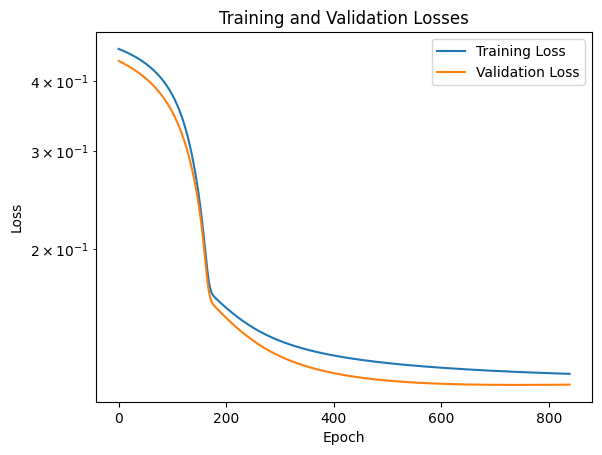

In [35]:
# Cria um modelo MLP com 5 unidades de entrada, 40 unidades ocultas e 1 unidade de saída
model = MLP_Classifier(
    input_units=X_train.shape[1],
    hidden_units=40,
    output_units=1,
    normalize=True,
    activation="sigmoid",
)

# Para que o conjunto de validaçao seja 20% do total, sendo 80% para treino temos que o validation_split = 0.25

(training_losses, validation_losses, best_weights, early_stopping_prev_loss) = (
    model.backpropagation(
        X_train,
        y_train,
        learning_rate=0.001,
        epochs=0,
        verbose=True,
        verbose_step=1000,
        early_stopping=True,
        patience=100,
        validation_split=0.25,
    )
)

# Deixar o gráfico mais suave
SMOOTH_GRAPH = True

if SMOOTH_GRAPH:
    training_losses = np.convolve(training_losses, np.ones(10) / 10, mode="valid")
    validation_losses = np.convolve(validation_losses, np.ones(10) / 10, mode="valid")

    plt.semilogy(training_losses, label="Training Loss")
    plt.semilogy(validation_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Losses")
    plt.legend()

    plt.show()

## 6. Avaliação do Modelo

Vamos avaliar o desempenho do nosso modelo no conjunto de teste:

Accuracy: 86.75%


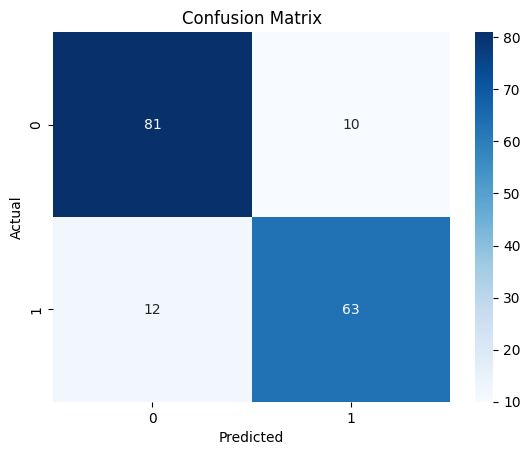

In [36]:
# Predict the output for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean((y_pred > 0.5) == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the confusion matrix of the best model


y_pred = model.predict(X_test)
y_pred_binary = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 7. Treinamento Adicional

Vamos realizar um treinamento adicional para avaliar o impacto de diferentes hiperparâmetros no desempenho do modelo:
- Número de neurônios na camada oculta
- função de ativação

Hidden Units: 4, Activation: sigmoid, Accuracy: 84.94%
Hidden Units: 4, Activation: relu, Accuracy: 86.14%
Hidden Units: 4, Activation: tanh, Accuracy: 84.34%
Hidden Units: 8, Activation: sigmoid, Accuracy: 84.34%
Hidden Units: 8, Activation: relu, Accuracy: 83.73%
Hidden Units: 8, Activation: tanh, Accuracy: 82.53%
Hidden Units: 16, Activation: sigmoid, Accuracy: 83.73%
Hidden Units: 16, Activation: relu, Accuracy: 80.72%
Hidden Units: 16, Activation: tanh, Accuracy: 84.94%
Hidden Units: 32, Activation: sigmoid, Accuracy: 86.75%
Hidden Units: 32, Activation: relu, Accuracy: 81.33%
Hidden Units: 32, Activation: tanh, Accuracy: 85.54%
Hidden Units: 64, Activation: sigmoid, Accuracy: 85.54%
Hidden Units: 64, Activation: relu, Accuracy: 84.94%
Hidden Units: 64, Activation: tanh, Accuracy: 83.13%
Hidden Units: 128, Activation: sigmoid, Accuracy: 84.34%
Hidden Units: 128, Activation: relu, Accuracy: 84.94%
Hidden Units: 128, Activation: tanh, Accuracy: 83.73%
Best model architecture: 5 -> 3

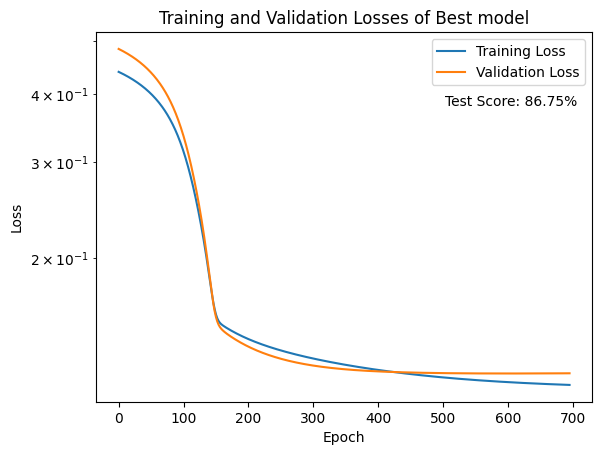

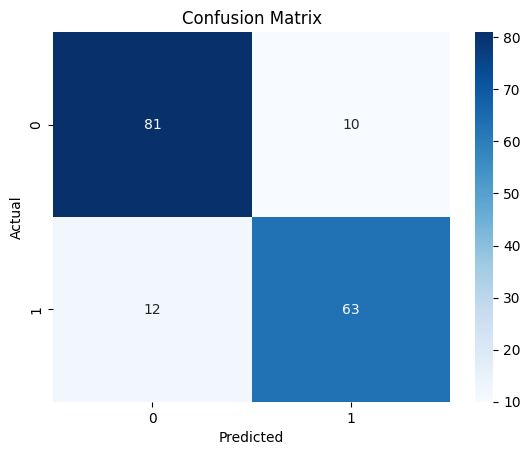

In [31]:
hidden_layer_sizes = [4, 8, 16, 32, 64, 128]
activation_functions = ["sigmoid", "relu", "tanh"]
best_accuracy = 0
best_model = None
best_training_losses = None
best_validation_losses = None


for hidden_units in hidden_layer_sizes:
    for activation in activation_functions:
        model = MLP_Classifier(
            input_units=X_train.shape[1],
            hidden_units=hidden_units,
            output_units=1,
            normalize=True,
            activation=activation,
        )
        (training_losses, validation_losses, best_weights, best_validation_loss) = (
            model.backpropagation(
                X_train,
                y_train,
                learning_rate=0.001,
                epochs=0,
                verbose=False,
                early_stopping=True,
                patience=100,
                validation_split=0.2,
            )
        )

        # Calculate the accuracy of the model
        y_pred = model.predict(X_test)
        accuracy = np.mean((y_pred > 0.5) == y_test)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model
            best_training_losses = training_losses
            best_validation_losses = validation_losses

        print(
            f"Hidden Units: {hidden_units}, Activation: {activation}, Accuracy: {accuracy * 100:.2f}%"
        )


print(f"Best model architecture: {best_model.input_units} -> {best_model.hidden_units} -> {best_model.output_units}")
print(f"Best model activation function: {best_model.activation}")

# Predict the output for the test set
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean((y_pred > 0.5) == y_test)
print(f"Accuracy of the best model: {accuracy * 100:.2f}%")


SMOOTH_GRAPH = True

if SMOOTH_GRAPH:
    training_losses = np.convolve(best_training_losses, np.ones(10) / 10, mode="valid")
    validation_losses = np.convolve(
        best_validation_losses, np.ones(10) / 10, mode="valid"
    )

    plt.semilogy(training_losses, label="Training Loss")
    plt.semilogy(validation_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Losses of Best model")
    plt.legend()

    plt.text(
        0.97,
        0.80,
        f"Test Score: {accuracy * 100:.2f}%",
        transform=plt.gca().transAxes,
        ha="right",
    )

    plt.show()


# Plot the confusion matrix of the best model


y_pred = best_model.predict(X_test)
y_pred_binary = y_pred > 0.5
cm = confusion_matrix(y_test, y_pred_binary)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




## 8. Conclusão

Neste notebook, demonstramos o processo de desenvolvimento de um projeto de Backpropagation, desde o planejamento inicial até a avaliação do modelo. Implementamos uma classe `MLP_Classifier` que permite flexibilidade na configuração da rede neural e aplicamos o modelo a um problema de classificação de mamografias.

O projeto ilustra os conceitos fundamentais de redes neurais artificiais e o processo de treinamento de uma rede neural utilizando o algoritmo de backpropagation. Através da implementação prática, pudemos explorar o impacto de diferentes hiperparâmetros no desempenho do modelo e avaliar a importância da escolha adequada de arquitetura e parâmetros para obter resultados satisfatórios.